# Run and plot IBD of pairs of Individuals

In [1]:
import socket as socket
import os as os
import sys as sys
import numpy as np
import matplotlib.pyplot as plt
socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())

sys.path.append("/n/groups/reich/hringbauer/git/hapBLOCK/python3/") 
#from main import HMM_Full
from run import hapBLOCK_chrom
from plot.plot_posterior import plot_posterior, plot_posterior_panel

### hapsburgImport
sys.path.insert(0,"/n/groups/reich/hringbauer/git/HAPSBURG/package/")
from hapsburg.PackagesSupport.parallel_runs.helper_functions import combine_individual_data

sys.path.insert(0,"/n/groups/reich/hringbauer/git/hapBLOCK/package/")  # hack to get development package first in path
from hapBLOCK.IO.h5_load import get_opp_homos_f

compute-e-16-231.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK


In [6]:
def run_plot_pair(folder_in="./data/hdf5/1240k_v43/ch", iids = ["", ""], ch=2,
                  folder_out="", plot=False, savepath="", output=False, 
                  ibd_in=1, ibd_out=10, ibd_jump=400, min_cm=2, 
                  cutoff_post=0.99, max_gap=0.0075,
                  title="", c="gray", c_hw="maroon", ms=1, state=0):
    """Run and plot IBD for pair of Individuals.
    folder_out: Where to save the hapBLOCK output to
    savepath: Where to save the IBD plot to"""
    assert(len(iids)==2) # Sanity Check of Input IIDs
    
    df_ibd, post, r_vec = hapBLOCK_chrom(
           folder_in=folder_in, iids = iids,  ch=ch, folder_out=folder_out, 
           output=output, prefix_out="", logfile=False,
           l_model="hdf5", e_model="haploid_gl", h_model="FiveStateScaled", 
           t_model="standard", ibd_in=ibd_in, ibd_out=ibd_out, ibd_jump=ibd_jump, 
           min_cm=min_cm, cutoff_post=cutoff_post, max_gap=max_gap)
        
    if plot:
        if len(title)==0:
            title = f"hapBLOCK v0.1, {iids[0]} - {iids[1]}, Chr. {ch}"
            
        ### Load the data from the HDF5
        o_homos, m = get_opp_homos_f(iid1=iids[0], iid2=iids[1], 
                                     f_path=folder_in, ch=ch)
        print(f"Plotting {len(r_vec)} markers")
        plot_posterior(post=post, morgan=r_vec, df_ibd=df_ibd, 
                       het=o_homos, het_m=m, state=state, fs_l=12, 
                       min_cm=min_cm, ms=ms, title=title, show=True, 
                       savepath=savepath, xlabel="Chromosome Position [cM]")
        return post
        
    # Legacy to plot the 5 state HMM   
    #if plot_5state:
    #    plot_posterior_panel(post=post, ch=ch, figsize=(12, 8),
    #                         xlim=[], lw=1, c=c, c_hw=c_hw, title=title, savepath=savepath)
    
def hapBLOCK_ind(folder_in="./data/hdf5/1240k_v43/ch", iids = ["", ""], 
                 ch=2, folder_out="", output=False, prefix_out="", logfile=False,
                 l_model="hdf5", e_model="haploid_gl", h_model="FiveStateFast", 
                 t_model="standard", ibd_in=1, ibd_out=1, ibd_jump=500, min_cm=2):
    """Run IBD for pair of Individuals.
    folder_in: hdf5 path up to chromosome.
    iids: List of IIDs to compare [length 2]
    folder_out: Where to save the hapBLOCK output to
    savepath: Where to save the IBD plot to"""
    assert(len(iids)==2) # Sanity Check of Input IIDs
    h = HMM_Full(folder_in=folder_in, l_model=l_model, t_model=t_model, 
                     e_model=e_model, h_model = h_model,
                     output=output, load=True)
    h.t_obj.set_params(ibd_in = ibd_in, ibd_out = ibd_out, ibd_jump = ibd_jump)
    h.l_obj.set_params(iids=iids, ch=ch)
    h.p_obj.set_params(ch=ch)
    #post, r_vec, fwd, bwd, tot_ll = h.run_fwd_bwd()
    post, r_vec = h.run_fwd_bwd(full=False)
    df_ibd, _, _ = h.p_obj.call_roh(r_vec, post)
    
    if len(folder_out)>0:
        folder_out = h.prepare_path(folder_out, iid=iids, ch=ch, prefix_out=prefix_out, logfile=logfile)
        h.p_obj.save_output(df=df_ibd, save_folder=folder_out) # r_map=[], post=[]

Runtime Loading: 0.3042006492614746 s
Runtime E Mat.: 0.011766195297241211 s
Runtime T Mat.: 0.07880806922912598 s
Runtime HMM calc.: 0.023142576217651367 s
Runtime Postprocessing: 0.024889469146728516 s
Filtering to 0.99 GP variants: 0.869x
Filtering to 0.99 GP variants: 0.902x
Filtering to common GP variants: 0.818x
Plotting 77601 markers


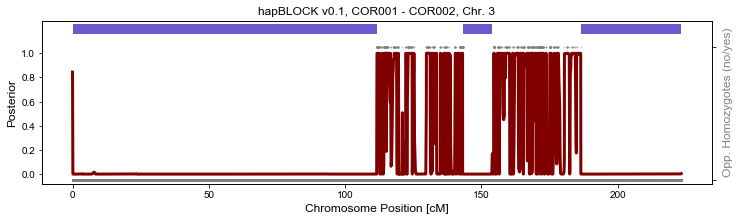

In [9]:
post = run_plot_pair(iids=["COR001", "COR002"], ch=3, min_cm=4, plot=True, 
                     folder_out="./output/empirical/punic/", output=False) # ./output/empirical/test2/"

Runtime Loading: 0.21474099159240723 s
Runtime E Mat.: 0.015210390090942383 s
Runtime T Mat.: 0.06746888160705566 s
Runtime HMM calc.: 0.0216982364654541 s
Runtime Postprocessing: 0.03080463409423828 s
Filtering to 0.99 GP variants: 0.902x
Filtering to 0.99 GP variants: 0.869x
Filtering to common GP variants: 0.818x
Plotting 77601 markers


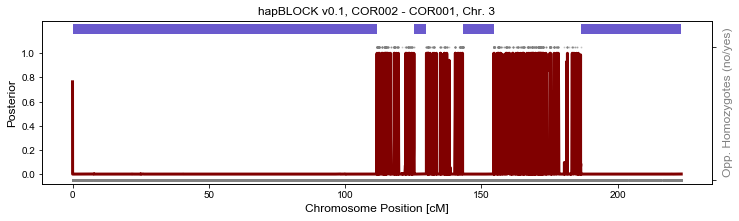

In [4]:
post = run_plot_pair(iids=["COR002","COR001"], ch=3, min_cm=4, plot=True, 
                     folder_out="./output/empirical/punic/", output=False) # ./output/empirical/test2/"

In [ ]:
post = run_plot_pair(iids=["COR002","COR001"], ch=2, min_cm=4, plot=True, 
                     folder_out="./output/empirical/punic/", output=False) # ./output/empirical/test2/"

Runtime Loading: 0.1491537094116211 s
Runtime E Mat.: 0.00879526138305664 s
Runtime T Mat.: 0.07239699363708496 s
Runtime HMM calc.: 0.01932239532470703 s
Runtime Postprocessing: 0.010933399200439453 s
Filtering to 0.99 GP variants: 0.821x
Filtering to 0.99 GP variants: 0.849x
Filtering to common GP variants: 0.746x
Plotting 77601 markers


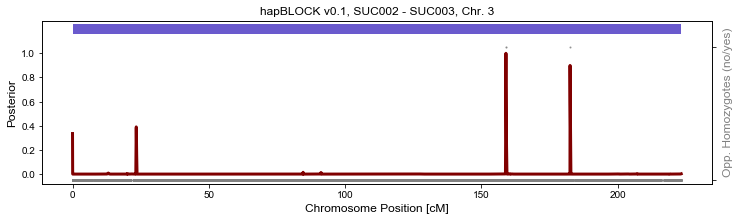

array([[3.35724487e-01, 3.09162206e-01, 2.28627575e-01, ...,
        2.12655416e-03, 2.35014528e-03, 2.52323206e-03],
       [4.86732757e-01, 5.08336829e-01, 5.75014004e-01, ...,
        4.56599357e-01, 4.56346391e-01, 4.54773048e-01],
       [9.18454196e-03, 8.50424028e-03, 5.86655036e-03, ...,
        1.34593230e-05, 5.56947318e-04, 2.35371565e-03],
       [1.59173672e-01, 1.65492484e-01, 1.84625320e-01, ...,
        1.34595831e-05, 5.56947560e-04, 2.35371589e-03],
       [9.18454196e-03, 8.50424028e-03, 5.86655036e-03, ...,
        5.41247170e-01, 5.40189569e-01, 5.37996289e-01]])

In [14]:
run_plot_pair(iids=["SUC002","SUC003"], ch=3, min_cm=4, plot=True, folder_out="") # ./output/empirical/test2/"

Runtime Loading: 0.1718449592590332 s
Runtime E Mat.: 0.010897397994995117 s
Runtime T Mat.: 0.04971480369567871 s
Runtime HMM calc.: 0.013885498046875 s
Runtime Postprocessing: 0.054079294204711914 s
Filtering to 0.99 GP variants: 0.724x
Filtering to 0.99 GP variants: 0.687x
Filtering to common GP variants: 0.558x
Plotting 58763 markers


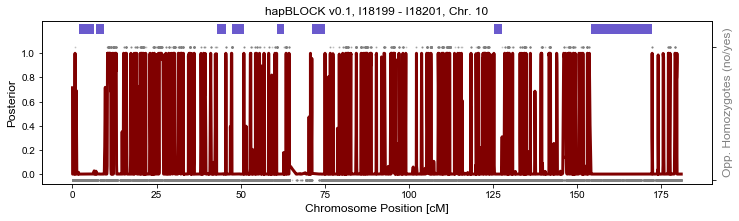

array([[7.14599341e-01, 4.15048732e-01, 2.57113786e-01, ...,
        1.74875256e-05, 4.85165851e-05, 1.18517727e-04],
       [5.96877540e-03, 1.13865413e-02, 1.34301589e-02, ...,
        9.99982182e-01, 9.99942357e-01, 9.99342604e-01],
       [8.14844074e-02, 1.67140027e-01, 2.12427055e-01, ...,
        4.21252996e-08, 4.56602653e-08, 5.81633741e-06],
       [6.01074121e-03, 1.14730971e-02, 1.35407461e-02, ...,
        1.10013065e-09, 3.22155170e-06, 5.21963578e-04],
       [1.91936735e-01, 3.94951603e-01, 5.03488254e-01, ...,
        2.87498023e-07, 5.85952709e-06, 1.10988314e-05]])

In [13]:
run_plot_pair(iids=["I18199","I18201"], ch=10, plot=True)

In [21]:
run_plot_pair(iids=["SUC002","SUC003"], ch=2)

### Run parent offspring

Runtime Loading: 0.15772533416748047 s
Runtime E Mat.: 0.008009195327758789 s
Runtime T Mat.: 0.06807255744934082 s
Runtime HMM calc.: 0.018887996673583984 s
Runtime Postprocessing: 0.02600550651550293 s
Filtering to 0.99 GP variants: 0.996x
Filtering to 0.99 GP variants: 0.997x
Filtering to common GP variants: 0.994x
Plotting 77601 markers


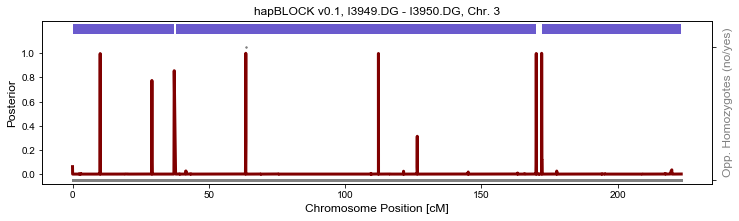

CPU times: user 715 ms, sys: 52.7 ms, total: 768 ms
Wall time: 799 ms


array([[6.15125093e-02, 2.39853295e-02, 1.65741471e-03, ...,
        1.81911799e-04, 4.29567735e-04, 5.94270353e-04],
       [1.98209715e-03, 8.97239706e-04, 4.58888311e-05, ...,
        1.54980058e-02, 1.83601694e-02, 1.96121223e-02],
       [1.12352969e-03, 4.45984149e-08, 3.89371332e-09, ...,
        5.18402400e-03, 8.17482069e-03, 9.48365964e-03],
       [1.12352969e-03, 4.45968140e-08, 3.32920249e-10, ...,
        5.18395996e-03, 8.17475745e-03, 9.48359675e-03],
       [9.34258334e-01, 9.75117342e-01, 9.98296692e-01, ...,
        9.73952098e-01, 9.64860685e-01, 9.60826351e-01]])

In [18]:
%%time
run_plot_pair(iids=["I3949.DG","I3950.DG"], ch=3, plot=True,
              ibd_in=1,ibd_out=10, ibd_jump=300)

Runtime Loading: 0.1581583023071289 s
Runtime E Mat.: 0.008392333984375 s
Runtime T Mat.: 0.06911563873291016 s
Runtime HMM calc.: 0.021646976470947266 s
Runtime Postprocessing: 0.07515859603881836 s
Filtering to 0.99 GP variants: 0.996x
Filtering to 0.99 GP variants: 0.997x
Filtering to common GP variants: 0.994x
Plotting 77601 markers


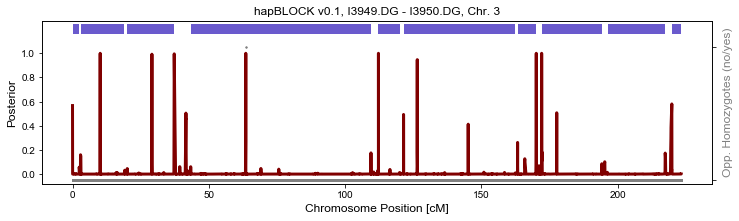

CPU times: user 841 ms, sys: 52.3 ms, total: 893 ms
Wall time: 925 ms


array([[5.67216474e-01, 2.21128247e-01, 1.52729428e-02, ...,
        3.63876944e-04, 8.58441017e-04, 1.18729900e-03],
       [9.14070636e-04, 7.16034205e-04, 7.00627761e-05, ...,
        1.54959307e-02, 1.83532151e-02, 1.96014943e-02],
       [5.18127986e-04, 3.55913910e-08, 3.04352093e-08, ...,
        5.18338744e-03, 8.17181179e-03, 9.47862347e-03],
       [5.18127986e-04, 3.55901134e-08, 2.60217898e-09, ...,
        5.18332341e-03, 8.17174857e-03, 9.47856062e-03],
       [4.30833199e-01, 7.78155648e-01, 9.84656961e-01, ...,
        9.73773482e-01, 9.64444784e-01, 9.60254023e-01]])

In [5]:
%%time
run_plot_pair(iids=["I3949.DG","I3950.DG"], ch=3, plot=True)

Runtime Loading: 2.0462646484375 s
Runtime E Mat.: 0.011729717254638672 s
Runtime T Mat.: 0.07939410209655762 s
Runtime HMM calc.: 0.01596212387084961 s
Runtime Postprocessing: 0.0029633045196533203 s
Filtering to 0.99 GP variants: 0.856x
Filtering to 0.99 GP variants: 0.944x
Filtering to common GP variants: 0.821x
Plotting 69354 markers


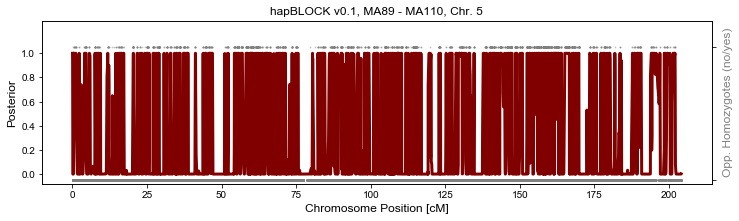

CPU times: user 847 ms, sys: 41.7 ms, total: 888 ms
Wall time: 2.79 s


array([[9.99984565e-01, 9.99984565e-01, 9.99984485e-01, ...,
        9.93724257e-04, 1.31696785e-03, 1.45214802e-03],
       [7.71771449e-06, 7.71771647e-06, 7.75758307e-06, ...,
        1.13011161e-01, 1.15953080e-01, 1.16953555e-01],
       [6.09077805e-13, 3.54685181e-13, 1.29415555e-14, ...,
        3.86807858e-01, 3.83697334e-01, 3.82626879e-01],
       [7.71771186e-06, 7.71771384e-06, 7.75758043e-06, ...,
        1.13011161e-01, 1.15953080e-01, 1.16953555e-01],
       [6.09076024e-13, 3.54683401e-13, 1.26685781e-14, ...,
        3.86176097e-01, 3.83079538e-01, 3.82013862e-01]])

In [17]:
%%time
run_plot_pair(iids=["MA89", "MA110"], ch=5, plot=True, min_cm=4,
             ibd_in=1,ibd_out=10, ibd_jump=400)

Runtime Loading: 1.202592372894287 s
Runtime E Mat.: 0.017005443572998047 s
Runtime T Mat.: 0.1118309497833252 s
Runtime HMM calc.: 0.021161556243896484 s
Runtime Postprocessing: 0.02442622184753418 s
Filtering to 0.99 GP variants: 0.871x
Filtering to 0.99 GP variants: 0.910x
Filtering to common GP variants: 0.824x
Plotting 94173 markers


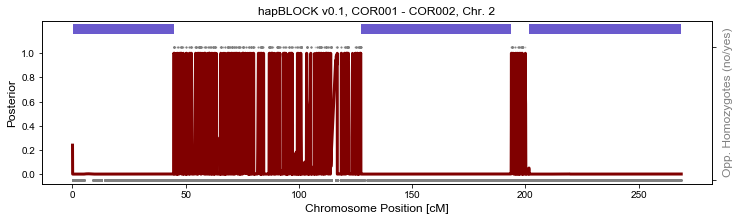

CPU times: user 917 ms, sys: 60.2 ms, total: 977 ms
Wall time: 1.99 s


array([[2.39541246e-01, 1.46401818e-01, 1.10208764e-01, ...,
        5.22127067e-04, 5.22127812e-04, 5.53423372e-04],
       [6.71461258e-01, 7.64394842e-01, 8.01650557e-01, ...,
        4.98898684e-01, 4.98898673e-01, 4.98503364e-01],
       [9.47809748e-03, 6.62563604e-03, 5.08839136e-03, ...,
        8.40252812e-04, 8.40262772e-04, 1.21992385e-03],
       [8.65653496e-03, 5.68519704e-03, 4.09980788e-03, ...,
        4.98898684e-01, 4.98898673e-01, 4.98503364e-01],
       [7.08628636e-02, 7.68925072e-02, 7.89524791e-02, ...,
        8.40252812e-04, 8.40262772e-04, 1.21992385e-03]])

In [41]:
%%time
run_plot_pair(iids=["COR001", "COR002"], ch=2, plot=True, min_cm=4,
              ibd_in=1,ibd_out=10, ibd_jump=400)

# Plot Inigos Samples

Runtime Loading: 1.509291172027588 s
Runtime E Mat.: 0.013981103897094727 s
Runtime T Mat.: 0.08237504959106445 s
Runtime HMM calc.: 0.024173974990844727 s
Runtime Postprocessing: 0.03281402587890625 s
Filtering to 0.99 GP variants: 0.853x
Filtering to 0.99 GP variants: 0.922x
Filtering to common GP variants: 0.814x
Plotting 77601 markers
Saved to ./figs/dumpster/for_23/ibd_emp_2.png


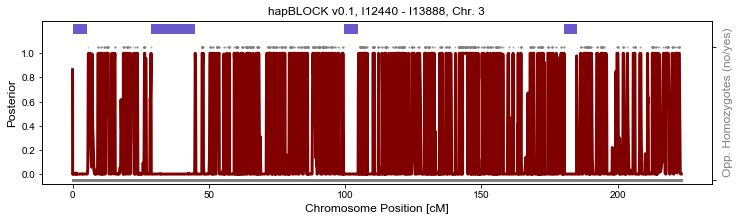

CPU times: user 3.4 s, sys: 113 ms, total: 3.51 s
Wall time: 4.83 s


array([[8.64110340e-01, 7.55442286e-01, 4.86424972e-01, ...,
        2.41671801e-04, 5.87563466e-04, 9.20088096e-04],
       [1.40968948e-03, 2.25497519e-03, 2.90400195e-03, ...,
        1.16807325e-04, 6.57853091e-04, 2.01369570e-03],
       [1.31331296e-01, 2.37197309e-01, 5.03593985e-01, ...,
        4.72974537e-05, 8.56853405e-04, 1.41163597e-03],
       [1.40872864e-03, 2.25323766e-03, 2.90029909e-03, ...,
        9.99360222e-01, 9.97537390e-01, 9.94734492e-01],
       [1.73994652e-03, 2.85219194e-03, 4.17674170e-03, ...,
        2.34001312e-04, 3.60340043e-04, 9.20088617e-04]])

In [21]:
%%time
run_plot_pair(iids=["I12440", "I13888"], ch=3, plot=True, min_cm=4, savepath="./figs/dumpster/for_23/ibd_emp_2.png")

Runtime Loading: 0.19829273223876953 s
Runtime E Mat.: 0.007791996002197266 s
Runtime T Mat.: 0.06945490837097168 s
Runtime HMM calc.: 0.02157306671142578 s
Runtime Postprocessing: 0.031471967697143555 s
Filtering to 0.99 GP variants: 0.853x
Filtering to 0.99 GP variants: 0.922x
Filtering to common GP variants: 0.814x
Plotting 77601 markers
Saved to ./figs/dumpster/for_23/ibd_emp_2.png


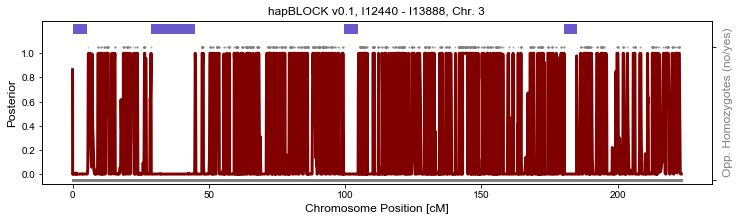

CPU times: user 3.33 s, sys: 85.2 ms, total: 3.42 s
Wall time: 3.49 s


array([[8.64110340e-01, 7.55442286e-01, 4.86424972e-01, ...,
        2.41671801e-04, 5.87563466e-04, 9.20088096e-04],
       [1.40968948e-03, 2.25497519e-03, 2.90400195e-03, ...,
        1.16807325e-04, 6.57853091e-04, 2.01369570e-03],
       [1.31331296e-01, 2.37197309e-01, 5.03593985e-01, ...,
        4.72974537e-05, 8.56853405e-04, 1.41163597e-03],
       [1.40872864e-03, 2.25323766e-03, 2.90029909e-03, ...,
        9.99360222e-01, 9.97537390e-01, 9.94734492e-01],
       [1.73994652e-03, 2.85219194e-03, 4.17674170e-03, ...,
        2.34001312e-04, 3.60340043e-04, 9.20088617e-04]])

In [7]:
%%time
run_plot_pair(iids=["I12440", "I13888"], ch=3, plot=True, min_cm=4, savepath="./figs/dumpster/for_23/ibd_emp_2.png")

Runtime Loading: 0.8776857852935791 s
Runtime E Mat.: 0.014576435089111328 s
Runtime T Mat.: 0.06783246994018555 s
Runtime HMM calc.: 0.02155900001525879 s
Runtime Postprocessing: 0.030348539352416992 s
Filtering to 0.99 GP variants: 0.853x
Filtering to 0.99 GP variants: 0.922x
Filtering to common GP variants: 0.814x
Plotting 77601 markers
Saved to ./figs/dumpster/for_23/ibd_emp_2.png


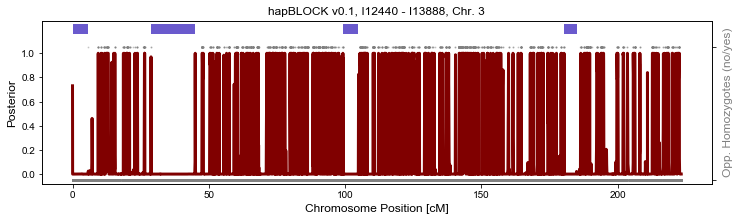

CPU times: user 3.38 s, sys: 88.3 ms, total: 3.47 s
Wall time: 4.17 s


array([[7.30750638e-01, 5.15437459e-01, 1.84744120e-01, ...,
        6.75825046e-05, 3.30175126e-04, 5.25249926e-04],
       [2.78920970e-03, 4.46092841e-03, 4.59806817e-03, ...,
        1.20139850e-04, 6.68069560e-04, 2.02988597e-03],
       [2.60224020e-01, 4.69990387e-01, 7.99430977e-01, ...,
        1.38415774e-05, 2.40435453e-04, 3.26445356e-04],
       [2.78878091e-03, 4.46015301e-03, 4.59674428e-03, ...,
        9.99722154e-01, 9.98663106e-01, 9.96928183e-01],
       [3.44735222e-03, 5.65107332e-03, 6.63009069e-03, ...,
        7.62825535e-05, 9.82133952e-05, 1.90235776e-04]])

In [7]:
%%time
run_plot_pair(iids=["I12440", "I13888"], ch=3, plot=True, min_cm=4, savepath="./figs/dumpster/for_23/ibd_emp_2.png")

Runtime Loading: 0.19958233833312988 s
Runtime E Mat.: 0.008666753768920898 s
Runtime T Mat.: 0.06952118873596191 s
Runtime HMM calc.: 0.020634174346923828 s
Runtime Postprocessing: 0.01311182975769043 s
Filtering to 0.99 GP variants: 0.565x
Filtering to 0.99 GP variants: 0.922x
Filtering to common GP variants: 0.550x
Plotting 77601 markers


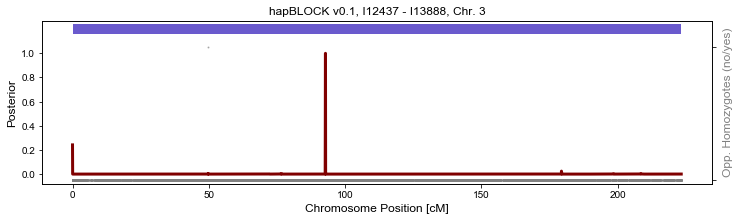

CPU times: user 699 ms, sys: 63.4 ms, total: 762 ms
Wall time: 800 ms


array([[2.41720096e-01, 2.11401037e-01, 1.36289936e-01, ...,
        2.80062557e-04, 3.18921294e-04, 3.36019115e-04],
       [1.29564170e-02, 1.19991706e-02, 8.11244022e-03, ...,
        4.46832875e-01, 4.45449313e-01, 4.44662736e-01],
       [1.87141445e-01, 1.94603822e-01, 2.13069948e-01, ...,
        3.36086619e-03, 5.90577493e-03, 7.02146586e-03],
       [1.29564170e-02, 1.19991706e-02, 8.11244022e-03, ...,
        5.45198574e-01, 5.41354719e-01, 5.39906800e-01],
       [5.45225625e-01, 5.69996800e-01, 6.34415236e-01, ...,
        4.32762229e-03, 6.97127139e-03, 8.07297924e-03]])

In [25]:
%%time
run_plot_pair(iids=["I12437", "I13888"], 
                    ch=3, plot=True, 
             ibd_in=1,ibd_out=1, ibd_jump=500) ### PO

Runtime Loading: 2.3941071033477783 s
Runtime E Mat.: 0.018720626831054688 s
Runtime T Mat.: 0.0811164379119873 s
Runtime HMM calc.: 0.021086454391479492 s
Runtime Postprocessing: 0.011467456817626953 s
Filtering to 0.99 GP variants: 0.565x
Filtering to 0.99 GP variants: 0.922x
Filtering to common GP variants: 0.550x
Plotting 77601 markers


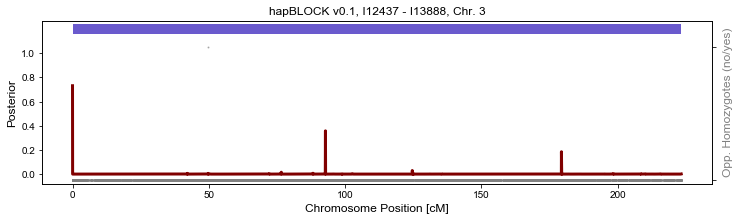

CPU times: user 810 ms, sys: 28.9 ms, total: 839 ms
Wall time: 3.05 s


In [10]:
%%time
post = run_plot_pair(iids=["I12437", "I13888"], ch=3, min_cm=4, 
                     plot=True, folder_out="", output=False) # ./output/empirical/test2/"

### The other side

Filtering to 0.99 GP variants: 0.915x
Filtering to 0.99 GP variants: 0.904x
Filtering to common GP variants: 0.852x


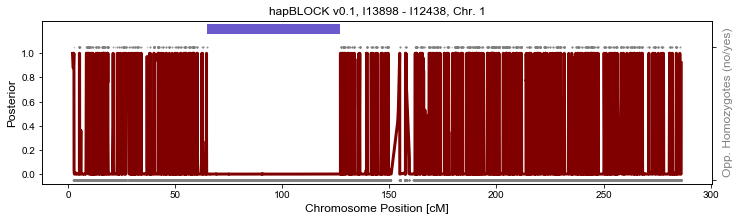

CPU times: user 1.28 s, sys: 44.1 ms, total: 1.32 s
Wall time: 1.43 s


In [41]:
%%time
iid1 ="I13898"
iid2 = "I12438"
ch=1
run_plot_pair(iids=[iid1, iid2], min_cm=4, 
              ch=ch, plot=True, output=False)  ### The two different sides

Minimum Genetic Map: 0.0201 Morgan
Maximum Genetic Map: 2.8627 Morgan
Gaps bigger than 0.1 cM: 253
Maximum Gap: 2.9229 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 293.781504 mB
Total Log likelihood: -207048.962
Fraction Markers above IBD cutoff: 0.7807
Merged n=0 gaps < 0.005 M
Called n=3 IBD Blocks > 4 cM
Longest Block: 15.13 cM
Fraction Markers above IBD cutoff: 0.7807
Merged n=0 gaps < 0.005 M
Called n=3 IBD Blocks > 4 cM
Longest Block: 15.13 cM
Filtering to 0.99 GP variants: 0.915x
Filtering to 0.99 GP variants: 0.869x
Filtering to common GP variants: 0.823x


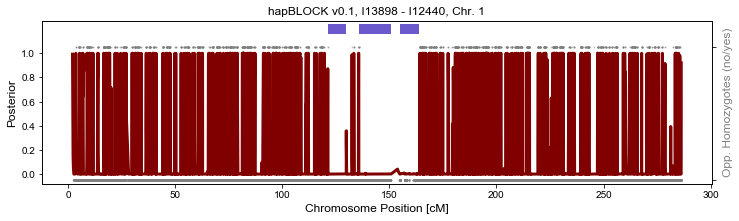

CPU times: user 1.43 s, sys: 65 ms, total: 1.49 s
Wall time: 1.57 s


In [43]:
%%time
iid1 ="I13898"
iid2 = "I12440"
ch=1
run_plot_pair(iids=[iid1, iid2], ch=ch, plot=True, output=True, min_cm=4)  ### The two different sides

In [ ]:
%%time
iid1 ="I13898"
iid2 = "I13890"
for ch in range(1,23):
    run_plot_pair(iids=[iid1, iid2], 
                        ibd_out=1, ibd_in=1, ch=ch, plot=True, output=True)  ### The two different sides

Minimum Genetic Map: 0.0201 Morgan
Maximum Genetic Map: 2.8627 Morgan
Gaps bigger than 0.1 cM: 253
Maximum Gap: 2.9229 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 276.353024 mB
Total Log likelihood: -208313.783
Fraction Markers above IBD cutoff: 0.8107
Merged n=0 gaps < 0.01 M
Called n=3 IBD Blocks > 4.0 cM
Longest Block: 28.49 cM
Fraction Markers above IBD cutoff: 0.8107
Merged n=0 gaps < 0.01 M
Called n=3 IBD Blocks > 4.0 cM
Longest Block: 28.49 cM
Filtering to 0.99 GP variants: 0.912x
Filtering to 0.99 GP variants: 0.866x
Filtering to common GP variants: 0.819x


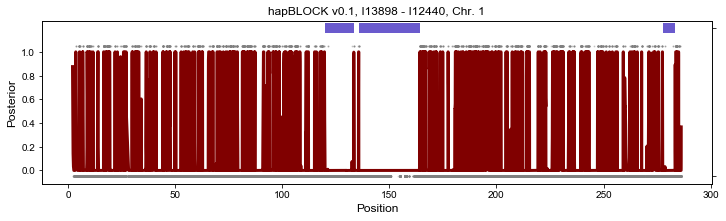

CPU times: user 1.32 s, sys: 45.3 ms, total: 1.37 s
Wall time: 2.07 s


In [106]:
%%time
iid1 ="I13898"
iid2 = "I12440"
ch=1
run_plot_pair(iids=[iid1, iid2], 
                    ibd_out=1, ibd_in=1, ch=ch, plot=True, output=True)  ### The two different sides

Runtime Loading: 0.14552569389343262 s
Runtime E Mat.: 0.008040189743041992 s
Minimum Genetic Map: 0.0000 Morgan
Maximum Genetic Map: 2.2326 Morgan
Gaps bigger than 0.1 cM: 214
Maximum Gap: 0.2348 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Runtime T Mat.: 0.07064032554626465 s
Memory Usage at end of HMM:
Memory Usage: 250.028032 mB
Runtime HMM calc.: 0.01894521713256836 s
Fraction Markers above IBD cutoff: 0.4087
Merged n=0 gaps < 0.0075 M
Called n=1 IBD Blocks > 4 cM
Longest Block: 14.83 cM
Runtime Postprocessing: 0.011498689651489258 s
Fraction Markers above IBD cutoff: 0.4087
Merged n=0 gaps < 0.0075 M
Called n=1 IBD Blocks > 4 cM
Longest Block: 14.83 cM
Filtering to 0.99 GP variants: 0.908x
Filtering to 0.99 GP variants: 0.937x
Filtering to common GP variants: 0.868x
Plotting 77601 markers


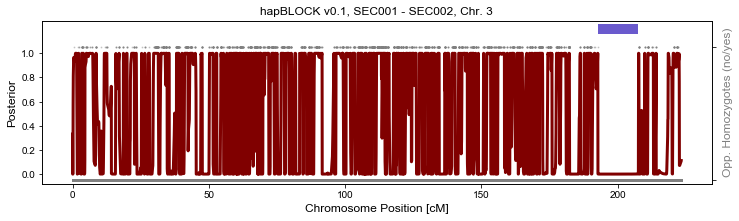

CPU times: user 674 ms, sys: 25.2 ms, total: 700 ms
Wall time: 751 ms


array([[3.30155250e-01, 3.03370272e-01, 2.21399551e-01, ...,
        1.11602573e-01, 1.12048106e-01, 1.12168954e-01],
       [1.30312568e-02, 1.25211621e-02, 1.04187041e-02, ...,
        8.83917044e-01, 8.87920845e-01, 8.86206276e-01],
       [6.34169054e-01, 6.62643817e-01, 7.51422022e-01, ...,
        1.48444308e-06, 3.05699661e-05, 3.86058328e-07],
       [1.13222198e-02, 1.07323743e-02, 8.37986172e-03, ...,
        8.02642338e-07, 3.22224394e-07, 1.62431779e-03],
       [1.13222198e-02, 1.07323743e-02, 8.37986171e-03, ...,
        4.47809634e-03, 1.56587496e-07, 6.66900164e-08]])

In [13]:
%%time
iid1 ="SEC001"
iid2 = "SEC002"
ch=3
run_plot_pair(iids=[iid1, iid2], min_cm=4, 
                    ch=ch, plot=True, output=True)  ### The two different sides

Filtering to 0.99 GP variants: 0.602x
Filtering to 0.99 GP variants: 0.872x
Filtering to common GP variants: 0.571x
Saved to ./figs/dumpster/for_inigo/I12437_I12440_4.png


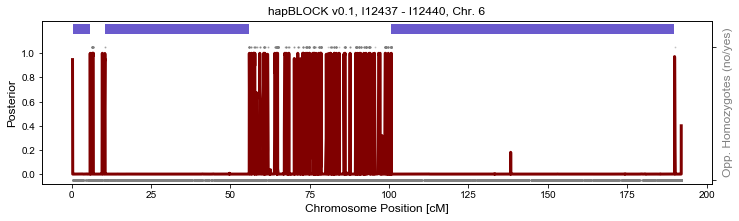

CPU times: user 3.44 s, sys: 92.5 ms, total: 3.53 s
Wall time: 3.63 s


In [47]:
%%time
run_plot_pair(iids=["I12437", "I12440"], 
              min_cm=4, ch=6, plot=True,
              savepath=f"./figs/dumpster/for_inigo/{iid1}_{iid2}_{ch}.png") ### 2nd degree

Filtering to 0.99 GP variants: 0.960x
Filtering to 0.99 GP variants: 0.872x
Filtering to common GP variants: 0.854x
Plotting 75816 markers
Saved to ./figs/dumpster/for_inigo/I12439_I12440_6.png


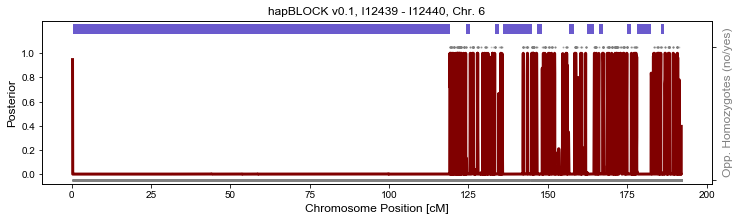

CPU times: user 3.59 s, sys: 61.2 ms, total: 3.65 s
Wall time: 3.71 s


In [8]:
%%time
iid1 ="I12439"
iid2 = "I12440"
ch=6
run_plot_pair(iids=[iid1, iid2], 
              ch=ch, min_cm=1, plot=True,
              savepath=f"./figs/dumpster/for_inigo/{iid1}_{iid2}_{ch}.png") ### 2nd degree

Runtime Loading: 0.17570209503173828 s
Runtime E Mat.: 0.007842540740966797 s
Runtime T Mat.: 0.06648135185241699 s
Runtime HMM calc.: 0.016190290451049805 s
Runtime Postprocessing: 0.10544776916503906 s
Filtering to 0.99 GP variants: 0.565x
Filtering to 0.99 GP variants: 0.951x
Filtering to common GP variants: 0.554x
Plotting 77601 markers


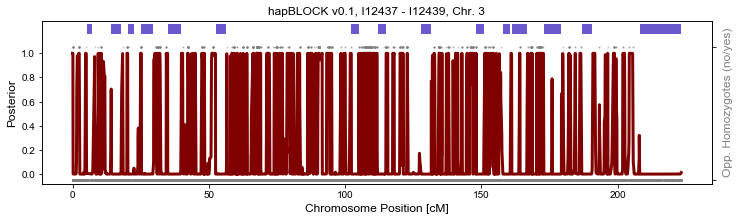

CPU times: user 932 ms, sys: 60.3 ms, total: 992 ms
Wall time: 1.02 s


array([[9.99999907e-01, 9.99999910e-01, 9.99999929e-01, ...,
        1.24953905e-02, 1.25334962e-02, 1.25503155e-02],
       [2.01335794e-08, 1.92476698e-08, 1.40831905e-08, ...,
        5.40380726e-01, 5.38714879e-01, 5.38060536e-01],
       [2.64282987e-08, 2.58466584e-08, 2.14895113e-08, ...,
        1.33876146e-03, 2.29466136e-03, 2.68831342e-03],
       [2.01335794e-08, 1.92476698e-08, 1.40831905e-08, ...,
        4.43950710e-01, 4.43675106e-01, 4.43538335e-01],
       [2.64282987e-08, 2.58466584e-08, 2.14895113e-08, ...,
        1.83441183e-03, 2.78185787e-03, 3.16250019e-03]])

In [28]:
%%time
iid1 ="I12437"
iid2 = "I12439"
ch=3
run_plot_pair(iids=["I12437", "I12439"], ch=ch, plot=True,
             ibd_in=1,ibd_out=1, ibd_jump=500)  ### The two different sides

Filtering to 0.99 GP variants: 0.934x
Filtering to 0.99 GP variants: 0.872x
Filtering to common GP variants: 0.836x
Plotting 75816 markers
Saved to ./figs/dumpster/for_inigo/I13888_I12440_6.png


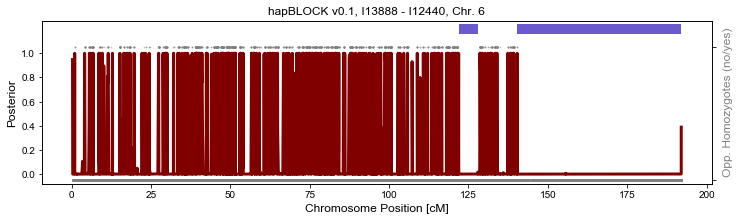

CPU times: user 3.63 s, sys: 96.2 ms, total: 3.73 s
Wall time: 5.39 s


In [10]:
%%time
iid1="I13888"
iid2="I12440"
run_plot_pair(iids=[iid1, iid2], 
              ibd_out=20, ibd_in=20, ch=6, plot=True, min_cm=4,
              savepath=f"./figs/dumpster/for_inigo/{iid1}_{iid2}_{ch}.png")

Minimum Genetic Map: 0.0016 Morgan
Maximum Genetic Map: 1.6630 Morgan
Gaps bigger than 0.1 cM: 168
Maximum Gap: 1.8819 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 370.221056 mB
Total Log likelihood: -114891.141
Fraction Markers above IBD cutoff: 0.9661
Merged n=3 gaps < 0.01 M
Called n=4 IBD Blocks > 4.0 cM
Longest Block: 77.69 cM
Fraction Markers above IBD cutoff: 0.9661
Merged n=3 gaps < 0.01 M
Called n=4 IBD Blocks > 4.0 cM
Longest Block: 77.69 cM
Filtering to 0.99 GP variants: 0.527x
Filtering to 0.99 GP variants: 0.842x
Filtering to common GP variants: 0.499x
Saved to ./figs/dumpster/for_inigo/I12437_I12440_9.png


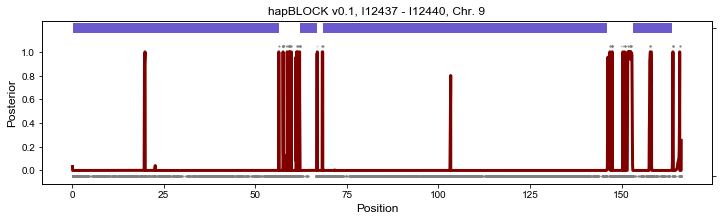

CPU times: user 2.98 s, sys: 55.2 ms, total: 3.04 s
Wall time: 3.64 s


In [478]:
%%time
iid1="I12437"
iid2="I12440"
ch=9
run_plot_pair(iids=[iid1,iid2], 
              ibd_out=1, ibd_in=1, ch=ch, 
              savepath=f"./figs/dumpster/for_inigo/{iid1}_{iid2}_{ch}.png")  ### From the right side

Filtering to 0.99 GP variants: 0.978x
Filtering to 0.99 GP variants: 0.853x
Filtering to common GP variants: 0.841x


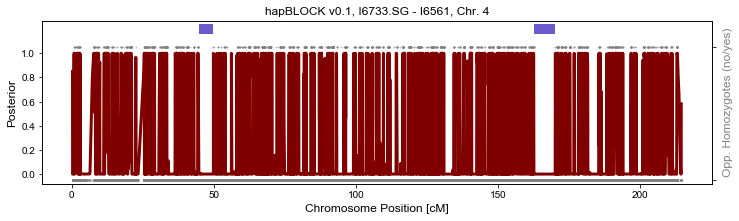

CPU times: user 1.11 s, sys: 25.7 ms, total: 1.14 s
Wall time: 1.2 s


In [57]:
%%time
iid1 ="I6733.SG"
iid2 = "I6561"

ch=4
run_plot_pair(iids=[iid1, iid2], min_cm=4,
                    ibd_out=20, ibd_in=20, ch=ch, plot=True)  ### The two different sides

Filtering to 0.99 GP variants: 0.893x
Filtering to 0.99 GP variants: 0.836x
Filtering to common GP variants: 0.785x
Saved to ./figs/dumpster/for_inigo/I13898_I12440_14.png


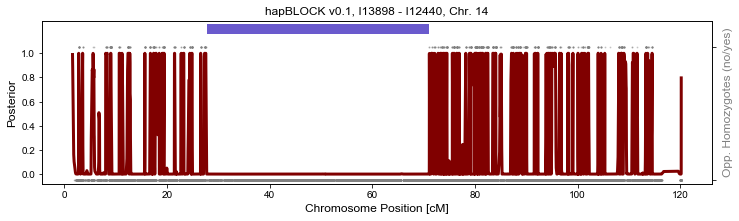

CPU times: user 2.86 s, sys: 36.9 ms, total: 2.9 s
Wall time: 2.96 s


In [58]:
%%time
iid1 ="I13898"
iid2 = "I12440"
ch=14
run_plot_pair(iids=[iid1, iid2], 
              ibd_out=20, ibd_in=20, ch=ch, plot=True, min_cm=4,
              savepath=f"./figs/dumpster/for_inigo/{iid1}_{iid2}_{ch}.png")  ### The two different sides

Minimum Genetic Map: 0.0201 Morgan
Maximum Genetic Map: 2.8627 Morgan
Gaps bigger than 0.1 cM: 253
Maximum Gap: 2.9229 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 370.200576 mB
Total Log likelihood: -204920.656
Fraction Markers above IBD cutoff: 0.8492
Merged n=0 gaps < 0.01 M
Called n=4 IBD Blocks > 4.0 cM
Longest Block: 39.08 cM
Fraction Markers above IBD cutoff: 0.8492
Merged n=0 gaps < 0.01 M
Called n=4 IBD Blocks > 4.0 cM
Longest Block: 39.08 cM
Filtering to 0.99 GP variants: 0.912x
Filtering to 0.99 GP variants: 0.926x
Filtering to common GP variants: 0.866x
Saved to ./figs/dumpster/for_inigo/I13898_I13888_1.png


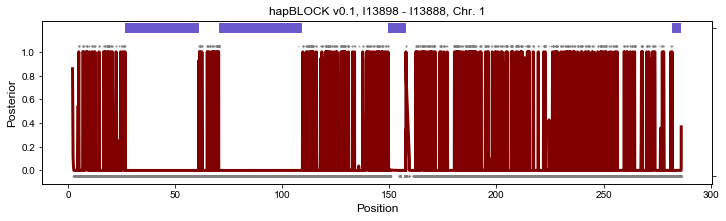

CPU times: user 3.74 s, sys: 77.7 ms, total: 3.82 s
Wall time: 3.89 s


In [400]:
%%time
iid1 ="I13898"
iid2 = "I13888"
ch=1
run_plot_pair(iids=[iid1, iid2], 
              ibd_out=1, ibd_in=1, ch=ch,
              savepath=f"./figs/dumpster/for_inigo/{iid1}_{iid2}_{ch}.png")  ### The two different sides

Filtering to 0.99 GP variants: 0.915x
Filtering to 0.99 GP variants: 0.584x
Filtering to common GP variants: 0.566x
Plotting 89082 markers
Saved to ./figs/dumpster/for_inigo/I13898_I12437_1.png


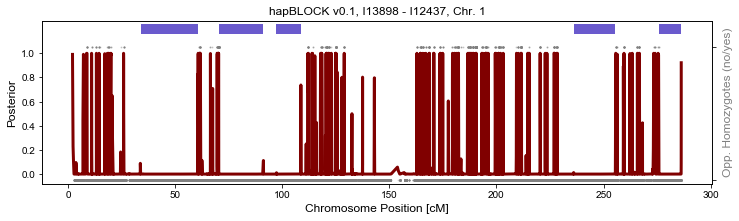

CPU times: user 3.5 s, sys: 47.5 ms, total: 3.54 s
Wall time: 3.59 s


In [13]:
%%time
iid1 ="I13898"
iid2 = "I12437"
ch=1
run_plot_pair(iids=[iid1, iid2], min_cm=8, plot=True,
              ibd_out=20, ibd_in=20, ch=ch,
              savepath=f"./figs/dumpster/for_inigo/{iid1}_{iid2}_{ch}.png")  ### The two different sides

## Check full relevant relatives in England N

In [ ]:
iids=["I12437","I12438"]
folder_out = "./output/empirical/england_n/"
chs = range(1,23)

for ch in chs:
    run_plot_pair(iids=iids, ch=ch, plot=True, folder_out=folder_out, output=False)

In [83]:
df_full = combine_individual_data(base_path=folder_out, iid=iids, delete=False, chs=chs, 
                                  prefix_out="", file="ibd.tsv", file_result="_ibd_full.csv")

In [86]:
df_t = df_full[df_full["lengthM"]>0.3]
np.sum(df_t["lengthM"]) # #I12433 - I12437, 1st degree

17.391162989345958

In [80]:
df_t = df_full[df_full["lengthM"]>0.2]
np.sum(df_t["lengthM"]) # I13891 - I13898, 5th degree

0.4056779958773405

In [75]:
df_t = df_full[df_full["lengthM"]>0.2]
np.sum(df_t["lengthM"]) # I13188 - I13898, 3rd degree

0.4056779958773405

In [70]:
df_t = df_full[df_full["lengthM"]>0.2]
np.sum(df_t["lengthM"]) # I13188 - I13898, 3rd degree

7.593811821599957

In [35]:
df_t = df_full[df_full["lengthM"]>0.2]
np.sum(df_t["lengthM"]) # I12438 - I12440, 2nd degree

18.79735005433531

In [32]:
df_t = df_full[df_full["lengthM"]>0.2]
np.sum(df_t["lengthM"]) # I12438 - I13898, 4-5th degree?

1.184385014581494

In [55]:
df_t = df_full[df_full["lengthM"]>0.2]
np.sum(df_t["lengthM"]) # I12440 - I3888, 3rd degree

9.844745199476165

In [63]:
df_t = df_full[df_full["lengthM"]>0.2]
np.sum(df_t["lengthM"]) #  I12440 - I13898 4th degree

1.9595299522625282

In [81]:
3600 / 2**(5-1)

225.0

# Call IBD between two Yamnaya 591km apart

Runtime Loading: 1.6068000793457031 s
Runtime E Mat.: 0.013050556182861328 s
Runtime T Mat.: 0.09066009521484375 s
Runtime HMM calc.: 0.018213748931884766 s
Runtime Postprocessing: 0.01101231575012207 s
Filtering to 0.99 GP variants: 0.922x
Filtering to 0.99 GP variants: 0.863x
Filtering to common GP variants: 0.818x
Plotting 77601 markers


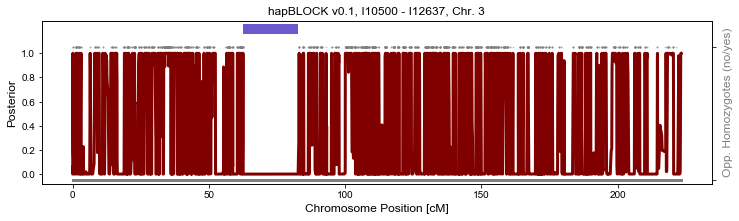

CPU times: user 843 ms, sys: 31.6 ms, total: 875 ms
Wall time: 2.3 s


array([[6.17840925e-02, 2.42677725e-02, 1.67888939e-03, ...,
        9.99999616e-01, 9.99996709e-01, 9.99982999e-01],
       [1.50555544e-03, 9.63235670e-06, 7.64017730e-09, ...,
        7.02959874e-08, 1.12015900e-06, 6.07281570e-06],
       [9.32510762e-01, 9.74459392e-01, 9.98198256e-01, ...,
        8.37373494e-08, 1.13339444e-06, 6.08598260e-06],
       [2.70098568e-03, 1.26084632e-03, 1.22805940e-04, ...,
        1.14836162e-07, 5.18518969e-07, 2.42131251e-06],
       [1.49860401e-03, 2.35653998e-06, 4.08487733e-08, ...,
        1.14836162e-07, 5.18518969e-07, 2.42131251e-06]])

In [42]:
%%time
iid1 ="I10500"
iid2 = "I12637"
ch=3
run_plot_pair(iids=[iid1, iid2], min_cm=8,
              ibd_in=1, ibd_out=10, ibd_jump=400, ch=ch, plot=True,
              savepath="")  ### The two different sides

# Call IBD between Punic Indivdiuals

In [39]:
iids=["I18201","I18203"]
folder_out = "./output/empirical/punic/"
chs = range(1,23)

for ch in chs:
    run_plot_pair(iids=iids, ch=ch, plot=False, folder_out=folder_out, output=False)

In [44]:
df_full = combine_individual_data(base_path=folder_out, iid=iids, delete=False, chs=chs, 
                                  prefix_out="", file="ibd.tsv", file_result="_ibd_full.csv")
df_t = df_full[df_full["lengthM"]>0.25]
np.sum(df_t["lengthM"]) # #I12433 - I12437, 1st degree

4.427339091547765

In [6]:
df_t = df_full[df_full["lengthM"]>0.2]
np.sum(df_t["lengthM"]) # #I12433 - I12437, 1st degree

7.4560876654223875

In [17]:
df_full = combine_individual_data(base_path=folder_out, iid=iids, delete=False, chs=chs, 
                                  prefix_out="", file="ibd.tsv", file_result="_ibd_full.csv")
df_t = df_full[df_full["lengthM"]>0.4]
np.sum(df_t["lengthM"]) # #I12433 - I12437, 1st degree

2.5893408032438856

Filtering to 0.99 GP variants: 0.978x
Filtering to 0.99 GP variants: 0.853x
Filtering to common GP variants: 0.841x
Plotting 68720 markers


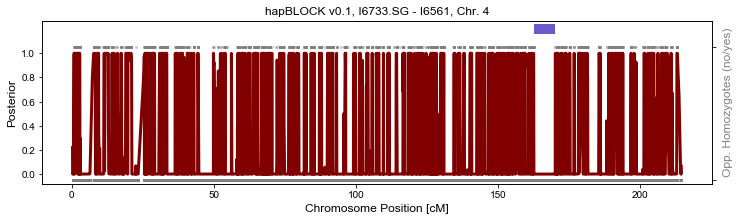

CPU times: user 1.22 s, sys: 63.6 ms, total: 1.28 s
Wall time: 4.19 s


In [17]:
%%time
iid1 ="I6733.SG"
iid2 = "I6561"
ch=4
run_plot_pair(iids=[iid1, iid2],
              ibd_out=1, ibd_in=1, ch=ch, min_cm=6, 
              plot=True, ms=2,
              savepath="")  ### The two different sides

# Sredni Stog outlier with its Yamnaya bro

In [ ]:
%%time

iid1 ="I6733.SG"
iid2 = "I6561"

folder_out = "./output/empirical/yamnaya/"
#folder_out = ""
chs = range(1,23)

for ch in chs:
    run_plot_pair(iids=[iid1,iid2], ch=ch, plot=True, folder_out=folder_out, 
                  output=False, min_cm=4)

In [7]:

df_full = combine_individual_data(base_path=folder_out, iid=[iid1,iid2], delete=False, chs=chs, 
                                  prefix_out="", file="ibd.tsv", file_result="_ibd_full.csv")
df_t = df_full[df_full["lengthM"]>0.04]
np.sum(df_t["lengthM"]) # #I12433 - I12437, 1st degree

1.7678930386318825

Runtime Loading: 1.1384835243225098 s
Runtime E Mat.: 0.010507583618164062 s
Runtime T Mat.: 0.0832059383392334 s
Runtime HMM calc.: 0.020037174224853516 s
Runtime Postprocessing: 0.018842220306396484 s
Filtering to 0.99 GP variants: 0.815x
Filtering to 0.99 GP variants: 0.434x
Filtering to common GP variants: 0.408x
Plotting 94173 markers
Saved to ./output/dumpster/I2097_I2099.png


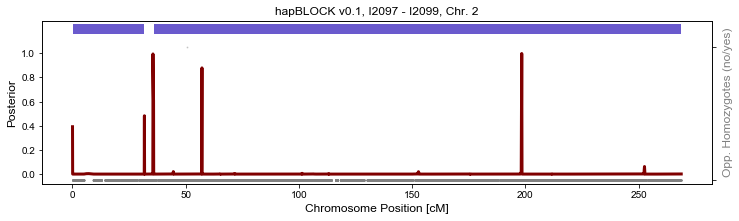

CPU times: user 2.78 s, sys: 49.1 ms, total: 2.83 s
Wall time: 3.78 s


array([[0.39199902, 0.31753235, 0.28852193, ..., 0.00090838, 0.00090838,
        0.00094   ],
       [0.14067246, 0.15765004, 0.16423742, ..., 0.22730383, 0.22730383,
        0.22733089],
       [0.28934645, 0.32783651, 0.34315482, ..., 0.22674582, 0.22674582,
        0.22677375],
       [0.14067246, 0.15765004, 0.16423742, ..., 0.25612648, 0.25612648,
        0.25610868],
       [0.03730961, 0.03933105, 0.03984841, ..., 0.2889155 , 0.2889155 ,
        0.28884667]])

In [45]:
%%time
iid1 = "I2097"
iid2 = "I2099"
ch = 2
run_plot_pair(iids=[iid1, iid2], 
              savepath=f"./output/dumpster/{iid1}_{iid2}.png",
              ibd_out=10, ibd_in=1, ibd_jump=400,
              ch=ch, plot=True, min_cm=4)  ### The two different sides

### Yamnaya Sredni Stog Hungary

In [ ]:
%%time

iid1 ="I6733.SG"
iid2 = "I18740"

folder_out = "./output/empirical/yamnaya/" #
#folder_out = ""
chs = range(1,23)

for ch in chs:
    run_plot_pair(iids=[iid1,iid2], ch=ch, plot=True, 
                  folder_out=folder_out, output=False)

In [17]:
df_full = combine_individual_data(base_path=folder_out, iid=[iid1,iid2], delete=False, chs=chs, 
                                  prefix_out="", file="ibd.tsv", file_result="_ibd_full.csv")
df_t = df_full[df_full["lengthM"]>0.04]
np.sum(df_t["lengthM"]) # #I12433 - I12437, 1st degree

1.4814000967890024

In [ ]:
df_t

In [ ]:
df_full = combine_individual_data(base_path=folder_out, iid=iids, delete=False, chs=chs, 
                                  prefix_out="", file="ibd.tsv", file_result="_ibd_full.csv")
df_t = df_full[df_full["lengthM"]>0.25]
np.sum(df_t["lengthM"]) # #I12433 - I12437, 1st degree

### Globular Amphora - Corded Ware

In [ ]:
iid1 ="MA969.SG" # Estonia Corded Ware
iid2 = "ILK002"

folder_out = "./output/empirical/yamnaya/" #
#folder_out = ""
chs = range(1,23)

for ch in chs:
    run_plot_pair(iids=[iid1,iid2], ch=ch, plot=True, 
                  folder_out=folder_out, output=False)

In [ ]:
iid1 ="MA969.SG" # Estonia Corded Ware
iid2 = "I6733.SG" # Yamnaya

folder_out = "./output/empirical/yamnaya/" #
#folder_out = ""
chs = range(1,23)

for ch in chs:
    run_plot_pair(iids=[iid1,iid2], ch=ch, plot=True, 
                  folder_out=folder_out, output=False)

In [ ]:
iid1 ="ILK002" # Globular Amphora
iid2 = "I6733.SG" # Yamnaya

folder_out = "./output/empirical/yamnaya/" #
#folder_out = ""
chs = range(1,23)

for ch in chs:
    run_plot_pair(iids=[iid1,iid2], ch=ch, plot=True, 
                  folder_out=folder_out, output=False)

# Do high coverage relatives

Runtime Loading: 1.8579084873199463 s
Runtime E Mat.: 0.017286062240600586 s
Runtime T Mat.: 0.09378218650817871 s
Runtime HMM calc.: 0.022372722625732422 s
Runtime Postprocessing: 0.0708158016204834 s
Filtering to 0.99 GP variants: 0.996x
Filtering to 0.99 GP variants: 0.939x
Filtering to common GP variants: 0.937x
Plotting 77601 markers


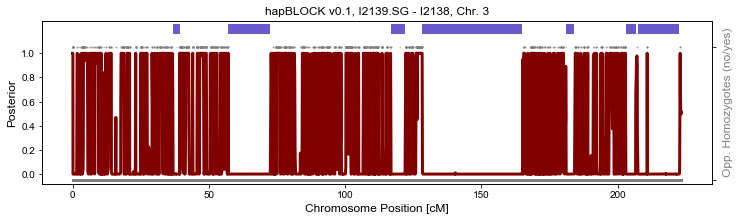

array([[9.99995138e-01, 9.99995011e-01, 9.99994812e-01, ...,
        5.11119509e-01, 5.11413129e-01, 5.11484774e-01],
       [1.58799257e-06, 1.63733405e-06, 1.73248138e-06, ...,
        3.88057465e-01, 3.76712252e-01, 3.74813686e-01],
       [8.42839345e-07, 8.57408901e-07, 8.61444070e-07, ...,
        9.44379846e-02, 9.77642078e-02, 9.79264274e-02],
       [1.58799257e-06, 1.63733405e-06, 1.73248138e-06, ...,
        2.89955798e-03, 9.63623698e-03, 1.04495200e-02],
       [8.42839345e-07, 8.57408901e-07, 8.61444070e-07, ...,
        3.48548346e-03, 4.47417386e-03, 5.32559267e-03]])

In [4]:
iid1 ="I2139.SG" # Estonia Corded Ware
iid2 = "I2138"

folder_out = "" #./output/empirical/yamnaya/

run_plot_pair(iids=[iid1,iid2], ch=3, plot=True, 
              ibd_in=1,ibd_out=10, ibd_jump=400, max_gap=0.0075,
              folder_out=folder_out, output=False)

Runtime Loading: 0.16275548934936523 s
Runtime E Mat.: 0.009219169616699219 s
Runtime T Mat.: 0.06877708435058594 s
Runtime HMM calc.: 0.019310474395751953 s
Runtime Postprocessing: 0.0743093490600586 s
Filtering to 0.99 GP variants: 0.996x
Filtering to 0.99 GP variants: 0.939x
Filtering to common GP variants: 0.937x
Plotting 77601 markers


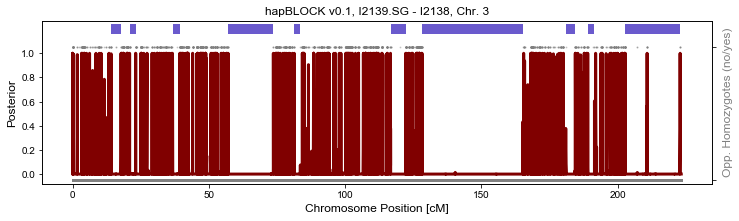

array([[5.65324754e-01, 2.17723756e-01, 1.30797125e-02, ...,
        2.21304656e-06, 4.95778416e-04, 5.76123739e-04],
       [1.00942721e-01, 1.81597669e-01, 2.28842723e-01, ...,
        9.13810917e-01, 8.82782430e-01, 8.79280088e-01],
       [1.16394902e-01, 2.09540453e-01, 2.64617421e-01, ...,
        7.28073844e-02, 8.85656429e-02, 8.94330876e-02],
       [1.00942721e-01, 1.81597669e-01, 2.28842723e-01, ...,
        2.83143955e-03, 1.37389318e-02, 1.50180735e-02],
       [1.16394902e-01, 2.09540453e-01, 2.64617421e-01, ...,
        1.05480455e-02, 1.44172173e-02, 1.56926272e-02]])

In [13]:
iid1 ="I2139.SG" # Estonia Corded Ware
iid2 = "I2138"

folder_out = "" #./output/empirical/yamnaya/

run_plot_pair(iids=[iid1,iid2], ch=3, plot=True, 
              ibd_in=20, min_cm=2,
              ibd_out=20,
              ibd_jump=300,
              folder_out=folder_out, output=False)

Runtime Loading: 1.9052088260650635 s
Runtime E Mat.: 0.018735647201538086 s
Runtime T Mat.: 0.09520268440246582 s
Runtime HMM calc.: 0.024492740631103516 s
Runtime Postprocessing: 0.03263974189758301 s
Filtering to 0.99 GP variants: 0.999x
Filtering to 0.99 GP variants: 0.984x
Filtering to common GP variants: 0.983x
Plotting 89082 markers


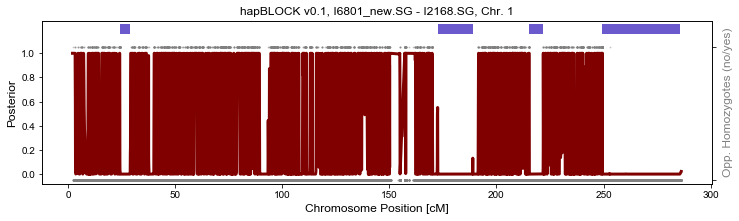

array([[9.99990336e-01, 9.99988204e-01, 9.99955934e-01, ...,
        2.07347315e-02, 2.11150050e-02, 2.16862957e-02],
       [5.49395475e-07, 4.50426284e-07, 2.02136459e-05, ...,
        7.07838352e-02, 7.36520879e-02, 7.77964926e-02],
       [5.36199140e-06, 6.89295753e-06, 2.38508309e-05, ...,
        4.18848799e-01, 4.15790410e-01, 4.11360360e-01],
       [4.20925950e-07, 2.78446558e-07, 4.90962369e-10, ...,
        7.07838352e-02, 7.36520879e-02, 7.77964926e-02],
       [3.33121131e-06, 4.17439059e-06, 5.49411434e-10, ...,
        4.18848799e-01, 4.15790410e-01, 4.11360360e-01]])

In [5]:
iid1 ="I6801_new.SG" # Estonia Corded Ware
iid2 = "I2168.SG"

folder_out = "" #./output/empirical/yamnaya/

run_plot_pair(iids=[iid1,iid2], ch=1, plot=True, 
              ibd_in=1,
              ibd_out=10,
              ibd_jump=400,
              savepath="", min_cm=4,
              folder_out=folder_out, output=False)

# Unrelated

Runtime Loading: 0.17031264305114746 s
Runtime E Mat.: 0.011321544647216797 s
Runtime T Mat.: 0.07038116455078125 s
Runtime HMM calc.: 0.021579265594482422 s
Runtime Postprocessing: 0.0032205581665039062 s
Filtering to 0.99 GP variants: 0.998x
Filtering to 0.99 GP variants: 0.996x
Filtering to common GP variants: 0.994x
Plotting 77601 markers


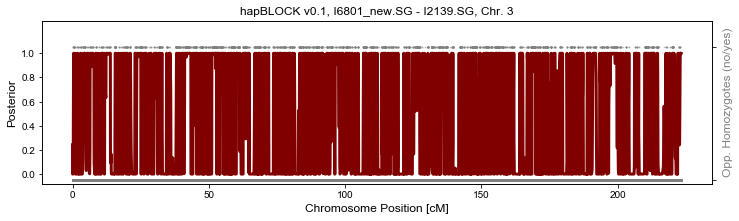

array([[2.41046902e-01, 2.10698754e-01, 1.35600668e-01, ...,
        9.98848393e-01, 9.98820424e-01, 9.98800720e-01],
       [1.45182228e-02, 1.39287676e-02, 1.12785993e-02, ...,
        6.36578274e-04, 1.51875015e-06, 8.61127412e-06],
       [1.45182228e-02, 1.39287676e-02, 1.12785993e-02, ...,
        1.77297325e-05, 7.81691469e-04, 7.83022171e-04],
       [3.64958326e-01, 3.80721855e-01, 4.20921067e-01, ...,
        9.01892196e-06, 3.95198277e-04, 3.99383353e-04],
       [3.64958326e-01, 3.80721855e-01, 4.20921067e-01, ...,
        4.88279577e-04, 1.16762232e-06, 8.26273947e-06]])

In [7]:
iid1 ="I6801_new.SG"
iid2 = "I2139.SG"

folder_out = "" #./output/empirical/yamnaya/

run_plot_pair(iids=[iid1,iid2], ch=3, plot=True, 
              ibd_in=1,
              ibd_out=10,
              ibd_jump=400,
              savepath="", min_cm=4,
              folder_out=folder_out, output=False)

Filtering to 0.99 GP variants: 0.997x
Filtering to 0.99 GP variants: 0.986x
Filtering to common GP variants: 0.984x
Plotting 89082 markers


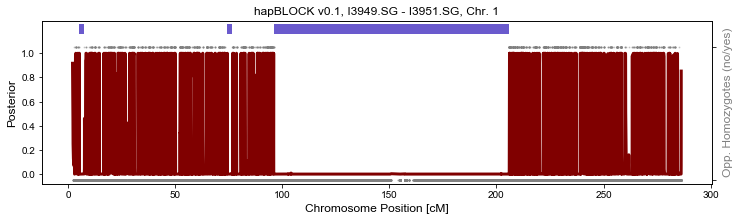

In [53]:
iid1 ="I3949.SG" # Estonia Corded Ware
iid2 = "I3951.SG"

folder_out = "" #./output/empirical/yamnaya/

run_plot_pair(iids=[iid1,iid2], ch=1, plot=True, 
              ibd_in=1,
              ibd_out=10,
              ibd_jump=300,
              folder_out=folder_out, output=False)

# Check the simulated individuals

Runtime Loading: 0.21706485748291016 s
Runtime E Mat.: 0.01230168342590332 s
Minimum Genetic Map: 0.0000 Morgan
Maximum Genetic Map: 2.2326 Morgan
Gaps bigger than 0.1 cM: 214
Maximum Gap: 0.2348 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Runtime T Mat.: 0.08073568344116211 s
Memory Usage at end of HMM:
Memory Usage: 200.278016 mB
Runtime HMM calc.: 0.022095680236816406 s
Fraction Markers above IBD cutoff: 0.6799
Merged n=0 gaps < 0.005 M
Called n=4 IBD Blocks > 4 cM
Longest Block: 20.35 cM
Runtime Postprocessing: 0.03415727615356445 s
Fraction Markers above IBD cutoff: 0.6799
Merged n=0 gaps < 0.005 M
Called n=4 IBD Blocks > 4 cM
Longest Block: 20.35 cM
Filtering to 0.99 GP variants: 1.000x
Filtering to 0.99 GP variants: 1.000x
Filtering to common GP variants: 1.000x
Plotting 77652 markers
Saved to ./figs/dumpster/for_23/example_sim.png


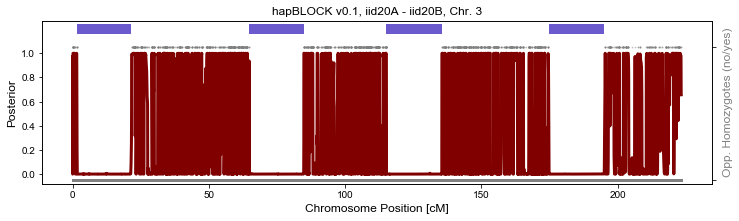

CPU times: user 2.76 s, sys: 104 ms, total: 2.86 s
Wall time: 3.05 s


array([[9.70579977e-01, 9.47053595e-01, 8.91195696e-01, ...,
        6.57208628e-01, 6.56737181e-01, 6.56579410e-01],
       [7.83835996e-05, 7.80002210e-05, 2.00847833e-03, ...,
        1.95760024e-04, 1.80067035e-04, 7.11141799e-04],
       [2.18156295e-02, 3.93863142e-02, 7.96793301e-02, ...,
        3.35266385e-01, 3.33903048e-01, 3.32518228e-01],
       [4.20980176e-05, 1.23835808e-05, 1.37040646e-04, ...,
        7.09691891e-03, 8.97216090e-03, 9.45276048e-03],
       [7.48391187e-03, 1.34697073e-02, 2.69794554e-02, ...,
        2.32307492e-04, 2.07542855e-04, 7.38459881e-04]])

In [8]:
%%time
iid1 ="iid20A" 
iid2 = "iid20B"

basepath = "/n/groups/reich/hringbauer/git/hapBLOCK/output/simulated/TSIs05/ch3_20cm/"
folder_in = os.path.join(basepath, "sim_ch")
folder_out = os.path.join(basepath, "inferred")
#folder_out = ""
ch = 3

run_plot_pair(folder_in = folder_in,
              iids=[iid1,iid2], ch=ch, plot=True, min_cm=4,
              folder_out="", output=True, state=0, savepath="./figs/dumpster/for_23/example_sim.png")

Runtime Loading: 0.16946053504943848 s
Runtime E Mat.: 0.007340669631958008 s
Minimum Genetic Map: 0.0000 Morgan
Maximum Genetic Map: 2.2326 Morgan
Gaps bigger than 0.1 cM: 348
Maximum Gap: 0.2565 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Runtime T Mat.: 0.04491758346557617 s
Memory Usage at end of HMM:
Memory Usage: 213.942272 mB
Runtime HMM calc.: 0.010237455368041992 s
Fraction Markers above IBD cutoff: 0.5783
Merged n=0 gaps < 0.005 M
Called n=4 IBD Blocks > 4 cM
Longest Block: 20.59 cM
Runtime Postprocessing: 0.035665035247802734 s
Fraction Markers above IBD cutoff: 0.5783
Merged n=0 gaps < 0.005 M
Called n=4 IBD Blocks > 4 cM
Longest Block: 20.59 cM
Filtering to 0.99 GP variants: 1.000x
Filtering to 0.99 GP variants: 1.000x
Filtering to common GP variants: 1.000x
Plotting 38799 markers


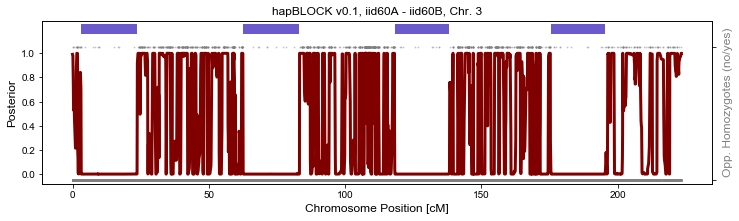

CPU times: user 647 ms, sys: 28.9 ms, total: 676 ms
Wall time: 826 ms


array([[9.91069549e-01, 9.87139610e-01, 9.86801866e-01, ...,
        9.99989412e-01, 9.99916128e-01, 9.99873194e-01],
       [1.52547764e-04, 9.49766181e-07, 8.20126013e-08, ...,
        1.50146944e-08, 1.19122652e-06, 1.94942366e-05],
       [1.56818269e-04, 7.54861454e-06, 1.27423356e-05, ...,
        6.26954508e-08, 1.83413940e-06, 1.71347521e-06],
       [1.70538761e-04, 2.87497237e-05, 1.33322493e-06, ...,
        1.13380513e-06, 1.19626228e-07, 5.20786310e-07],
       [8.45054652e-03, 1.28231417e-02, 1.31839764e-02, ...,
        9.37657608e-06, 8.07273455e-05, 1.05077342e-04]])

In [10]:
%%time
iid1 ="iid60A" 
iid2 = "iid60B"

basepath = "/n/groups/reich/hringbauer/git/hapBLOCK/output/simulated/TSI05s05e1/ch3_20cm/"
folder_in = os.path.join(basepath, "sim_ch")
folder_out = os.path.join(basepath, "inferred")
#folder_out = ""
ch = 3

run_plot_pair(folder_in = folder_in,
              iids=[iid1,iid2], ch=ch, plot=True, min_cm=4,
              ibd_in=1, ibd_out=10, ibd_jump=400,
              folder_out="", output=True, state=0, savepath="") # ./figs/dumpster/for_23/sim_error_post.png

# Area 51

In [3]:
iid1 ="iid20A" 
iid2 = "iid20B"
basepath = "/n/groups/reich/hringbauer/git/hapBLOCK/output/simulated/TSIs05/ch3_20cm/sim_ch"

o_homos, m = get_opp_homos_f(iid1=iid1, iid2=iid2, 
                                     f_path=basepath, ch=3)

Filtering to 0.99 GP variants: 1.000x
Filtering to 0.99 GP variants: 1.000x
Filtering to common GP variants: 1.000x
